In [428]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [409]:
data = pd.read_csv('dengue.csv').dropna()
print(data)

      Unnamed: 0      humid    humid90       temp     temp90     h10pix  \
0              1   0.671389   4.416667   2.037500   8.470835  17.356529   
1              2   7.648334   8.167500  12.325000  14.925000  10.983610   
2              3   6.979056   9.563058   6.925000  14.591660  17.508329   
3              4   1.110416   1.825361   4.641665   6.046669  17.417635   
4              5   9.027055   9.742751  18.175000  19.710000  13.843060   
5              6   8.914111   9.516778  11.900000  16.643341  11.691670   
6              7   5.295555   5.781750   9.254150  13.165820  17.838750   
7              8   1.150833   1.218611   7.116670   8.875000  11.691670   
8              9   8.529445   8.941834  20.424999  22.086641  18.875000   
9             10   8.543639   9.065972  15.154150  17.226690  12.250280   
10            11   6.594583   6.626528  10.191700  10.291700  17.894720   
11            12   1.032444   1.298777   0.954165   2.397497  17.736945   
12            13   4.2634

In [410]:
X = data[['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']].values

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

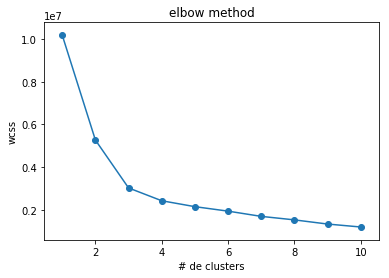

In [411]:
plt.plot(np.linspace(1,10,10), wcss)
plt.scatter(np.linspace(1,10,10), wcss)
plt.xlabel('# de clusters')
plt.ylabel('wcss')
plt.title('elbow method')
plt.show()

El número óptimo de clusters es 3

In [412]:
data = pd.read_csv('BreadBasket_DMS.csv')
X = data.iloc[:,0:2].values
y = data.iloc[:,3].values
import datetime
import time
print(data)
for i in range(len(X[:,1])):
    X[i,1] = time.strptime(X[i,1].split(',')[0],'%H:%M:%S')
    X[i,1] = datetime.timedelta(hours=X[i,1].tm_hour,minutes=X[i,1].tm_min,seconds=X[i,1].tm_sec).total_seconds()
counter = 1
date = X[0,0]
print(date)
for i in range(len(X[:,0])):
    if (X[i,0] == date):
        X[i,0] = counter
    else:
        date = X[i,0]
        counter += 1
        X[i,0] = counter
print(X)

             Date      Time  Transaction                  Item
0      2016-10-30  09:58:11            1                 Bread
1      2016-10-30  10:05:34            2          Scandinavian
2      2016-10-30  10:05:34            2          Scandinavian
3      2016-10-30  10:07:57            3         Hot chocolate
4      2016-10-30  10:07:57            3                   Jam
5      2016-10-30  10:07:57            3               Cookies
6      2016-10-30  10:08:41            4                Muffin
7      2016-10-30  10:13:03            5                Coffee
8      2016-10-30  10:13:03            5                Pastry
9      2016-10-30  10:13:03            5                 Bread
10     2016-10-30  10:16:55            6             Medialuna
11     2016-10-30  10:16:55            6                Pastry
12     2016-10-30  10:16:55            6                Muffin
13     2016-10-30  10:19:12            7             Medialuna
14     2016-10-30  10:19:12            7               

In [413]:
sc = StandardScaler()
x = sc.fit_transform(X)
n_features = len(x[0,:])
pca = PCA(n_components=None)
pca.fit(x)
Variance_Ratio = pca.explained_variance_ratio_
print(Variance_Ratio)

[ 0.52954172  0.47045828]


/home/juan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [414]:
pca3 = PCA(n_components=2)
P = pca3.fit_transform(x)
Z = pca3.components_
print(Z)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


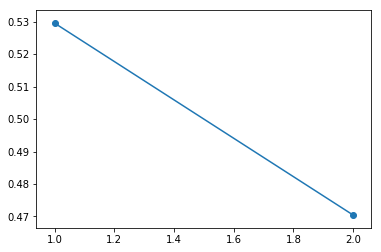

In [415]:
X1 = np.linspace(1,2,2)
plt.plot(X1, Variance_Ratio)
plt.scatter(X1, Variance_Ratio)
plt.show()

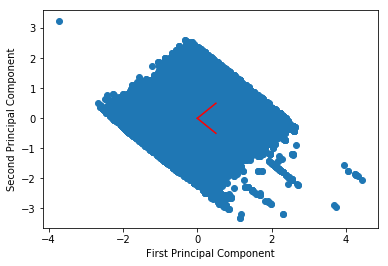

In [416]:
X1 = P[:,0]
X2 = P[:,1]

def f(x, y):
    m = y/x
    return m

x = np.linspace(0,0.5)
plt.scatter(X1,-X2)
plt.plot(x, -f(Z[0,0], Z[1,0])*x, color = 'red')
plt.plot(x, -f(Z[0,1], Z[1,1])*x, color = 'red')
plt.ylabel('Second Principal Component')
plt.xlabel('First Principal Component')
plt.show()

In [425]:
X = data.iloc[:,0:3].values
y = data.iloc[:,3].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

import datetime
import time
for i in range(len(X[:,1])):
    X[i,1] = time.strptime(X[i,1].split(',')[0],'%H:%M:%S')
    X[i,1] = datetime.timedelta(hours=X[i,1].tm_hour,minutes=X[i,1].tm_min,seconds=X[i,1].tm_sec).total_seconds()
counter = 1
date = X[0,0]
for i in range(len(X[:,0])):
    if (X[i,0] == date):
        X[i,0] = counter
    else:
        date = X[i,0]
        counter += 1
        X[i,0] = counter

Z = X[:,[0,1]]

In [426]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

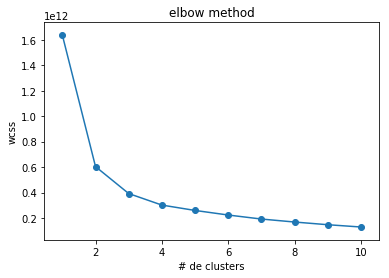

In [427]:
plt.plot(np.linspace(1,10,10), wcss)
plt.scatter(np.linspace(1,10,10), wcss)
plt.xlabel('# de clusters')
plt.ylabel('wcss')
plt.title('elbow method')
plt.show()

In [436]:
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(Z)

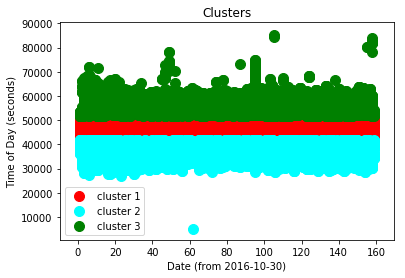

In [421]:
plt.scatter(Z[y_kmeans == 0, 0], Z[y_kmeans == 0, 1], s = 100, c = 'red', label = 'cluster 1')
plt.scatter(Z[y_kmeans == 1, 0], Z[y_kmeans == 1, 1], s = 100, c = 'cyan', label = 'cluster 2')
plt.scatter(Z[y_kmeans == 2, 0], Z[y_kmeans == 2, 1], s = 100, c = 'green', label = 'cluster 3')
plt.legend()
plt.ylabel('Time of Day (seconds)')
plt.xlabel('Date (from 2016-10-30)')
plt.title('Clusters')
plt.show()

In [351]:
data = pd.read_csv('BreadBasket_DMS.csv')

In [386]:
D = []
M = []
Y = []
H = []
S = []
Mn = []
T = [] 

for i in (data['Date'][1:]):
    K = i.split("-")
    D.append(K[2])
    M.append(K[1])
    Y.append(K[0])
    
for i in (data['Time'][1:]):
    K = i.split(':')
    H.append(K[0])
    Mn.append(K[1])
    S.append(K[2])

for i in (data['Transaction'][1:]):
    T.append(i)
    
X = np.transpose(np.array([D, M,Mn, Y, H, S, T]))
print(X)

[['30' '10' '05' ..., '10' '34' '2']
 ['30' '10' '05' ..., '10' '34' '2']
 ['30' '10' '07' ..., '10' '57' '3']
 ..., 
 ['09' '04' '57' ..., '14' '06' '9683']
 ['09' '04' '57' ..., '14' '06' '9683']
 ['09' '04' '04' ..., '15' '24' '9684']]


In [387]:
n_feat = 7

sc = StandardScaler()
X = sc.fit_transform(X)
pca = PCA(n_components=None)
pca.fit(X)
Variance_Ratio = pca.explained_variance_ratio_

comvariance = []
count = Variance_Ratio[0]
for i in range(0,7):
    if i > 0:
        count += Variance_Ratio[i]
    comvariance.append(count)
print(X)

[[ 1.66746011  0.89851066 -1.38313568 ..., -0.97081329  0.26332999
  -1.77583184]
 [ 1.66746011  0.89851066 -1.38313568 ..., -0.97081329  0.26332999
  -1.77583184]
 [ 1.66746011  0.89851066 -1.26899808 ..., -0.97081329  1.58974695
  -1.7754731 ]
 ..., 
 [-0.68346511 -0.41789396  1.58444176 ...,  0.75119496 -1.35143848
   1.69710798]
 [-0.68346511 -0.41789396  1.58444176 ...,  0.75119496 -1.35143848
   1.69710798]
 [-0.68346511 -0.41789396 -1.44020447 ...,  1.18169703 -0.31337303
   1.69746672]]


/home/juan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype <U4 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [388]:
pca3 = PCA(n_components=2)
X1 = pca3.fit_transform(X)
components = pca3.components_
print(X1)

[[ 2.29437902  0.05597255]
 [ 2.29437902  0.05597255]
 [ 2.29780026 -0.14427117]
 ..., 
 [-1.73552577 -0.41502015]
 [-1.73552577 -0.41502015]
 [-1.7074289   1.92539606]]


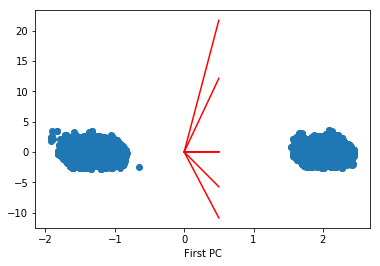

In [393]:
def f(x, y):
    m = y/x
    return m


x = np.linspace(0,0.5)
plt.scatter(X1[:,0], X1[:,1])
for i in range(n_features):
    plt.plot(x, f(components[0,i], components[1,i])*x, color = 'red')
plt.xlabel('First PC')
plt.ylabel
plt.show()

In [396]:
X = np.transpose(np.array([D, M,Mn, Y, H, S, T]))


wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

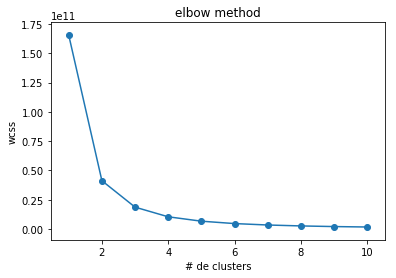

In [398]:
plt.plot(np.linspace(1,10,10), wcss)
plt.scatter(np.linspace(1,10,10), wcss)
plt.xlabel('# de clusters')
plt.ylabel('wcss')
plt.title('elbow method')
plt.show()

In [431]:
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)